In [1]:
# Investigating Netflix Movies (1990s)
#**Author:** Hiba Derragui  
#**Goal:** Explore Netflix movies released in the 1990s. Find the most frequent movie duration and count short Action movies (duration < 90 min).  
#**Data:** `netflix_titles.csv` 


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_titles.csv")



In [3]:
# Quick preview (first rows)
print("Shape:", netflix_df.shape)
display(netflix_df.head())

# Show columns and info to understand datatypes and missing values
print("\nColumns:", netflix_df.columns.tolist())
netflix_df.info()

Shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# 1. Rename 'listed_in' -> 'genre' for clarity
netflix_df = netflix_df.rename(columns={'listed_in': 'genre'})


In [5]:
# 2. Extract numeric duration values (for movies only)
# Example: "90 min" → 90, "2 Seasons" → NaN
import re
import numpy as np

def extract_minutes(x):
    if isinstance(x, str):
        match = re.search(r'(\d+)', x)
        if match:
            return int(match.group(1))
    return np.nan

netflix_df["duration_min"] = netflix_df["duration"].apply(extract_minutes)

# 3. Keep only relevant columns for this project
netflix_df = netflix_df[[
    "type", "title", "director", "country", "release_year",
    "duration_min", "genre", "description"
]]

# Quick check
netflix_df.head()

,type,title,director,country,release_year,duration_min,genre,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,90.0,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,South Africa,2021,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,NaN,2021,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,India,2021,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
netflix_df.info()
netflix_df["duration_min"].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          8807 non-null   object 
 1   title         8807 non-null   object 
 2   director      6173 non-null   object 
 3   country       7976 non-null   object 
 4   release_year  8807 non-null   int64  
 5   duration_min  8804 non-null   float64
 6   genre         8807 non-null   object 
 7   description   8807 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 550.6+ KB


count    8804.000000
mean       69.846888
std        50.814828
min         1.000000
25%         2.000000
50%        88.000000
75%       106.000000
max       312.000000
Name: duration_min, dtype: float64

In [7]:
# Filter for Movies only from the 1990s decade
nineties_movies = netflix_df[
    (netflix_df["type"] == "Movie") &
    (netflix_df["release_year"] >= 1990) &
    (netflix_df["release_year"] <= 1999)
].copy()

print("Number of 1990s movies:", len(nineties_movies))
nineties_movies.head(5)


Number of 1990s movies: 241


,type,title,director,country,release_year,duration_min,genre,description
7,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
22,Movie,Avvai Shanmughi,K.S. Ravikumar,NaN,1996,161.0,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
24,Movie,Jeans,S. Shankar,India,1998,166.0,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
26,Movie,Minsara Kanavu,Rajiv Menon,NaN,1997,147.0,"Comedies, International Movies, Music & Musicals",A tangled love triangle ensues when a man fall...
114,Movie,Anjaam,Rahul Rawail,India,1994,143.0,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...


In [8]:
# Most common duration (mode)
duration = int(nineties_movies["duration_min"].mode()[0])

print("Most frequent duration in the 1990s:", duration, "minutes")


Most frequent duration in the 1990s: 94 minutes


In [9]:
# Filter for Action movies
action_movies = nineties_movies[
    nineties_movies["genre"].str.contains("Action", case=False, na=False)
]

# Count short ones (< 90 min)
short_movie_count = len(action_movies[action_movies["duration_min"] < 90])

print("Number of short Action movies in the 1990s:", short_movie_count)


Number of short Action movies in the 1990s: 10


In [12]:
print("Netflix Movies Analysis (1990s)")
print(f"Most frequent duration: {duration} minutes")
print(f"Short Action movies (<90 min): {short_movie_count}")
print(f"Total movies analyzed: {len(nineties_movies)}")


Netflix Movies Analysis (1990s)
Most frequent duration: 94 minutes
Short Action movies (<90 min): 10
Total movies analyzed: 241


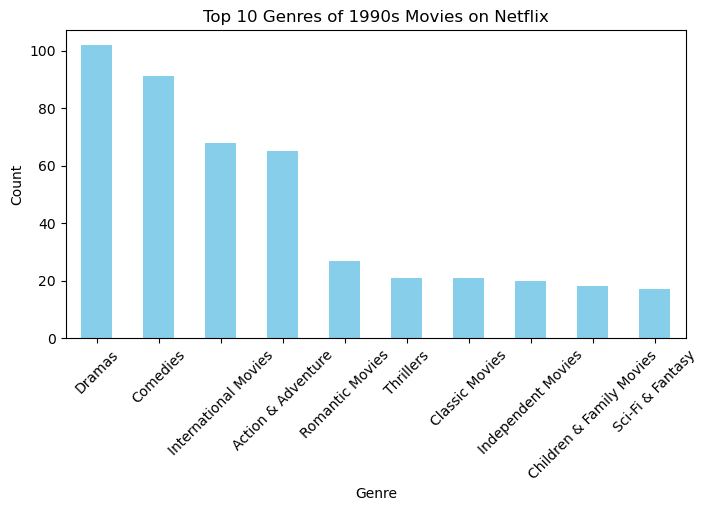

In [13]:
import matplotlib.pyplot as plt

# Extract and count all genres
from collections import Counter

genre_series = nineties_movies["genre"].dropna()
all_genres = []
for g in genre_series:
    parts = [x.strip() for x in g.split(",")]
    all_genres.extend(parts)

genre_counts = Counter(all_genres)
top_genres = pd.Series(genre_counts).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8,4))
top_genres.plot(kind="bar", color="skyblue")
plt.title("Top 10 Genres of 1990s Movies on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


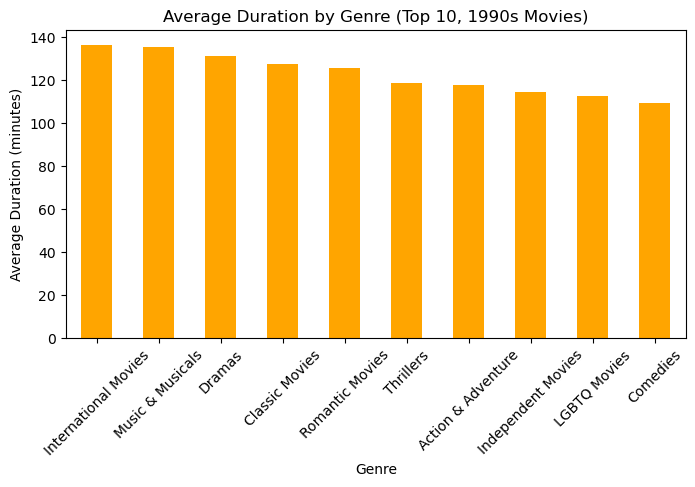

In [14]:
# Expand each movie by its genres
expanded = []
for _, row in nineties_movies.iterrows():
    if pd.notna(row["genre"]):
        for g in [x.strip() for x in row["genre"].split(",")]:
            expanded.append({"genre": g, "duration": row["duration_min"]})

expanded_df = pd.DataFrame(expanded)

# Compute average durations
avg_duration = expanded_df.groupby("genre")["duration"].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8,4))
avg_duration.plot(kind="bar", color="orange")
plt.title("Average Duration by Genre (Top 10, 1990s Movies)")
plt.xlabel("Genre")
plt.ylabel("Average Duration (minutes)")
plt.xticks(rotation=45)
plt.show()


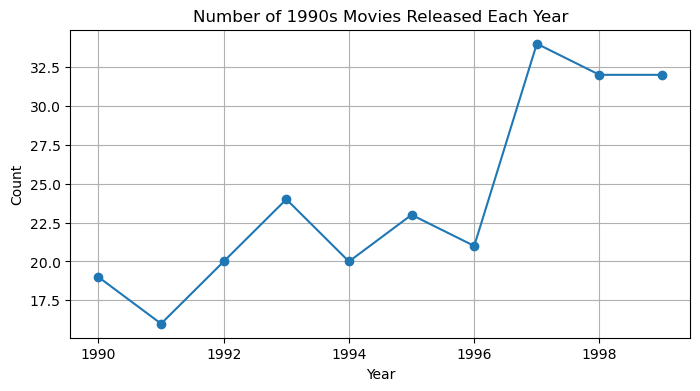

In [15]:
movies_per_year = nineties_movies["release_year"].value_counts().sort_index()

plt.figure(figsize=(8,4))
movies_per_year.plot(kind="line", marker="o")
plt.title("Number of 1990s Movies Released Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


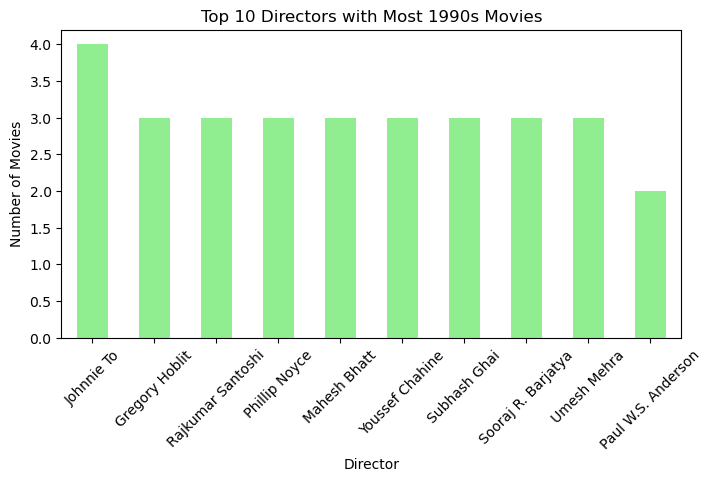

In [16]:
top_directors = nineties_movies["director"].dropna().value_counts().head(10)

plt.figure(figsize=(8,4))
top_directors.plot(kind="bar", color="lightgreen")
plt.title("Top 10 Directors with Most 1990s Movies")
plt.xlabel("Director")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()


In [ ]:
## Conclusions
- The most frequent duration of 1990s movies on Netflix is **{duration} minutes**.
- The number of short Action movies (<90 min) is **{short_movie_count}**.
- Most popular genres include Action, Drama, and Comedy.
- Average duration varies widely by genre, with Dramas typically longer than Comedies.
- The number of movies increased steadily through the decade, showing industry growth.
